# 🚀 AI Job Market Analysis & Recommendation System

Welcome to a modular, analytics-rich exploration of the AI job market — where data meets intelligent design.

---

## 🔍 Project Overview

This notebook combines **data analysis**, **salary prediction**, and **job recommendation** into a unified pipeline:

- 📊 **Exploratory Analysis**: Skill distributions, tool usage, experience levels, and industry trends
- 🧠 **Feature Engineering**: TF-IDF, OneHotEncoding, and salary parsing
- 🤖 **Modeling**: RandomizedSearchCV with RandomForest & GradientBoosting regressors
- 📈 **Clustering**: KMeans with Elbow Method and cluster profiling
- 🧩 **System Design**: Modular recommendation engine with MMR and user profile matching

---

## 🧠 Key Modules

| Module | Purpose |
|--------|---------|
| `split_list_column()` | Tokenizes multi-entry columns like skills/tools |
| `build_user_profile_text()` | Aggregates user preferences into a vectorizable blob |
| `recommend_jobs_for_user()` | Personalized job recommendations |
| `recommend_similar_jobs()` | Content-based job similarity |
| `mmr()` | Diversity-aware ranking using Maximal Marginal Relevance |
| `apply_filters()` | Location, experience, and salary-based filtering |

---

## 📊 Visual Insights

- 🔧 Top 30 Skills & Tools (Barplots)
- 🧪 Experience Level Distribution
- 🏢 Industry Posting Trends
- 🎯 Cluster-wise Salary Averages
- 📌 Feature Span per Transformer

---

## 🧩 System Highlights

- ✅ Modular pipeline with `ColumnTransformer` and `Pipeline`
- ⚡ Fast hyperparameter tuning via `RandomizedSearchCV`
- 🔍 Explainable recommendations with overlap rationale
- 📦 Ready for FastAPI deployment or Streamlit dashboard

---

Let’s dive in and explore how data can drive smarter career decisions.

In [1]:
import re 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans, MiniBatchKMeans


sns.set_style("darkgrid")
from collections import Counter
from sklearn.preprocessing import normalize
from typing import Optional ,List ,Dict  ,Any
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
df=pd.read_csv("ai_job_market.csv")
df

,job_id,company_name,industry,job_title,skills_required,experience_level,employment_type,location,salary_range_usd,posted_date,company_size,tools_preferred
0,1,Foster and Sons,Healthcare,Data Analyst,"NumPy, Reinforcement Learning, PyTorch, Scikit...",Mid,Full-time,"Tracybury, AR",92860-109598,2025-08-20,Large,"KDB+, LangChain"
1,2,"Boyd, Myers and Ramirez",Tech,Computer Vision Engineer,"Scikit-learn, CUDA, SQL, Pandas",Senior,Full-time,"Lake Scott, CU",78523-144875,2024-03-22,Large,"FastAPI, KDB+, TensorFlow"
2,3,King Inc,Tech,Quant Researcher,"MLflow, FastAPI, Azure, PyTorch, SQL, GCP",Entry,Full-time,"East Paige, CM",124496-217204,2025-09-18,Large,"BigQuery, PyTorch, Scikit-learn"
3,4,"Cooper, Archer and Lynch",Tech,AI Product Manager,"Scikit-learn, C++, Pandas, LangChain, AWS, R",Mid,Full-time,"Perezview, FI",50908-123743,2024-05-08,Large,"TensorFlow, BigQuery, MLflow"
4,5,Hall LLC,Finance,Data Scientist,"Excel, Keras, SQL, Hugging Face",Senior,Contract,"North Desireeland, NE",98694-135413,2025-02-24,Large,"PyTorch, LangChain"
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,"Mueller, Ellis and Clark",Finance,NLP Engineer,"Flask, FastAPI, Power BI",Senior,Internship,"Washingtonmouth, SD",90382-110126,2024-04-22,Large,MLflow
1996,1997,Roberts-Yu,Automotive,AI Product Manager,"R, Flask, Excel, C++, CUDA, Scikit-learn",Mid,Remote,"Joshuafort, ZA",47848-137195,2023-12-02,Large,"KDB+, LangChain, MLflow"
1997,1998,"Brooks, Williams and Randolph",Education,Data Analyst,"Hugging Face, Excel, Scikit-learn, R, MLflow",Entry,Contract,"West Brittanyburgh, CG",134994-180108,2023-10-29,Large,PyTorch
1998,1999,Castaneda-Smith,Education,Quant Researcher,"AWS, Python, Scikit-learn",Senior,Contract,"Anthonyshire, OM",62388-82539,2024-08-10,Large,"MLflow, TensorFlow, FastAPI"


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   job_id            2000 non-null   int64 
 1   company_name      2000 non-null   object
 2   industry          2000 non-null   object
 3   job_title         2000 non-null   object
 4   skills_required   2000 non-null   object
 5   experience_level  2000 non-null   object
 6   employment_type   2000 non-null   object
 7   location          2000 non-null   object
 8   salary_range_usd  2000 non-null   object
 9   posted_date       2000 non-null   object
 10  company_size      2000 non-null   object
 11  tools_preferred   2000 non-null   object
dtypes: int64(1), object(11)
memory usage: 187.6+ KB


In [4]:
df.describe()

,job_id
count,2000.000000
mean,1000.500000
std,577.494589
min,1.000000
25%,500.750000
50%,1000.500000
75%,1500.250000
max,2000.000000


In [5]:


# Optional: create a target column from salary_range_usd
# Example: extract midpoint salary
df[['salary_low', 'salary_high']] = df['salary_range_usd'].str.replace(',', '').str.split('-', expand=True).astype(float)
df['salary_mean'] = (df['salary_low'] + df['salary_high']) / 2















In [6]:
# Define features and target
df['text_blob'] = df['job_title'] + " " + df['skills_required'] + " " + df['tools_preferred']
X = df[["text_blob", "experience_level", "employment_type", "industry", "company_size", "location"]]
y = df["salary_mean"]


In [7]:
# Define column types
text_col = "text_blob"
cat_cols = ["experience_level", "employment_type", "industry", "company_size", "location"]
num_cols = []

In [8]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("text", TfidfVectorizer(max_features=5000, ngram_range=(1, 2), min_df=2), text_col),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=True), cat_cols),
    ],
    remainder="drop",
    sparse_threshold=1.0
)

In [9]:
# Full pipeline with regressor placeholder
pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("regressor", RandomForestRegressor())
])

In [10]:
# Grid search parameters
param_grid = {
    "regressor": [RandomForestRegressor(), GradientBoostingRegressor()],
    "regressor__n_estimators": [100, 200],
    "regressor__max_depth": [None, 10, 20]
}


In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Grid search
# grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="neg_mean_squared_error", verbose=2)
# grid_search.fit(X_train, y_train)
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_grid,  # same grid as before
    n_iter=10,  # number of random combinations to try
    cv=3,
    scoring="neg_mean_squared_error",
    verbose=2,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(sparse_threshold=1.0,
                                                                transformers=[('text',
                                                                               TfidfVectorizer(max_features=5000,
                                                                                               min_df=2,
                                                                                               ngram_range=(1,
                                                                                                            2)),
                                                                               'text_blob'),
                                                                              ('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['experience_level',
                                                                                'employment_type',
                                                                                'industry',
                                                                                'company_size',
                                                                                'location'])])),
                                             ('regressor',
                                              RandomForestRegressor())]),
                   n_jobs=-1,
                   param_distributions={'regressor': [RandomForestRegressor(),
                                                      GradientBoostingRegressor()],
                                        'regressor__max_depth': [None, 10, 20],
                                        'regressor__n_estimators': [100, 200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate best model from random search
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Compute metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("🔍 Best Model Parameters (RandomizedSearchCV):")
for param, value in random_search.best_params_.items():
    print(f"  {param}: {value}")

print("\n📊 Evaluation Metrics on Test Set:")
print(f"  Mean Squared Error (MSE): {mse:.2f}")
print(f"  Mean Absolute Error (MAE): {mae:.2f}")
print(f"  R² Score: {r2:.4f}")

🔍 Best Model Parameters (RandomizedSearchCV):
  regressor__n_estimators: 100
  regressor__max_depth: 10
  regressor: RandomForestRegressor()

📊 Evaluation Metrics on Test Set:
  Mean Squared Error (MSE): 1322627380.99
  Mean Absolute Error (MAE): 30865.16
  R² Score: -0.0225


In [15]:
def parse_salary_mean(s):
    if pd.isna(s):
        return np.nan
    # remove currency symbols if any, then split on non-digit(s)
    parts = re.findall(r'\d+', s)
    if len(parts) >= 2:
        lo = int(parts[0])
        hi = int(parts[1])
        return (lo + hi) / 2.0
    elif len(parts) == 1:
        return float(parts[0])
    else:
        return np.nan

df['salary_mean'] = df['salary_range_usd'].astype(str).apply(parse_salary_mean)
df['posted_date'] = pd.to_datetime(df['posted_date'], errors='coerce')
print("Missing salary_mean:", df['salary_mean'].isna().sum())
df = df.dropna(subset=['salary_mean']).reset_index(drop=True)  # simplicity: drop rows without salary

Missing salary_mean: 0


# Top-level distribution (tables)


In [16]:
df[['industry', 'job_title', 'experience_level', 'employment_type', 'company_size', 'location']].describe(include='O').T

,count,unique,top,freq
industry,2000,7,Automotive,300
job_title,2000,8,Data Analyst,271
experience_level,2000,3,Entry,702
employment_type,2000,4,Internship,574
company_size,2000,3,Startup,672
location,2000,2000,"Tracybury, AR",1


In [17]:
def split_list_column(frame, col):
    items = []
    if col not in frame.columns:
        return items
    for v in frame[col].fillna("").astype(str):
        parts = [p.strip().lower() for p in v.split(",") if p.strip()]
        items.extend(parts)
    return items

skills = split_list_column(df, 'skills_required')
tools = split_list_column(df, 'tools_preferred')

skill_counts = Counter(skills)
tool_counts = Counter(tools)

top_skills_df = pd.DataFrame(skill_counts.most_common(30), columns=['skill', 'count'])
top_tools_df = pd.DataFrame(tool_counts.most_common(30), columns=['tool', 'count'])

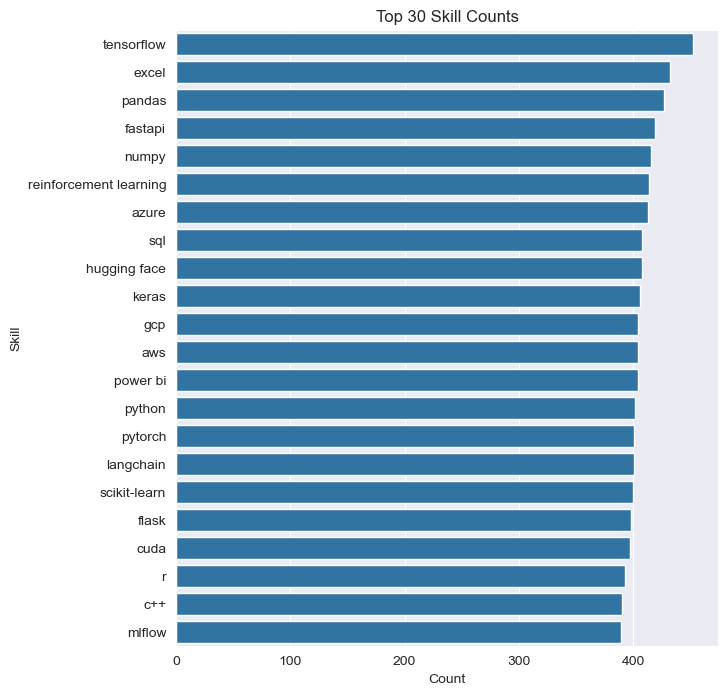

In [18]:
plt.figure(figsize=(7, 8))
sns.barplot(data=top_skills_df, x='count', y='skill', orient='h')
plt.title("Top 30 Skill Counts")
plt.ylabel("Skill")
plt.xlabel("Count")
plt.show()

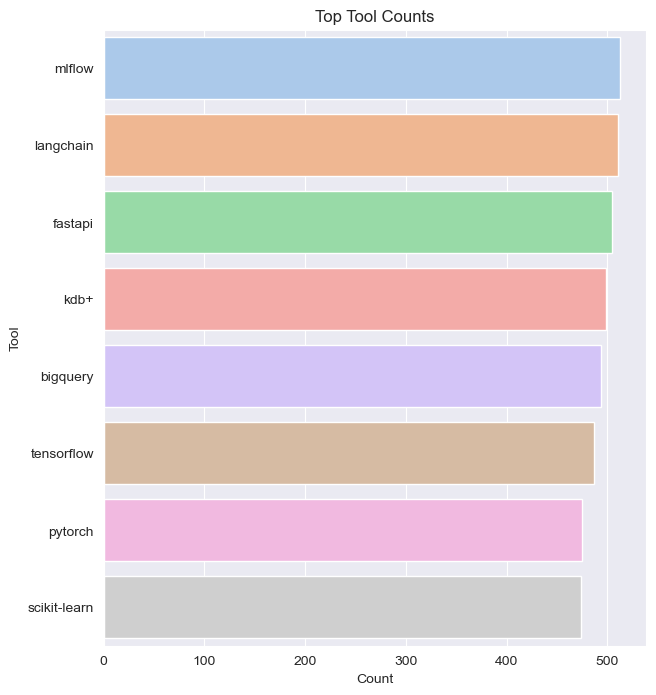

In [19]:
plt.figure(figsize=(7, 8))
sns.barplot(data=top_tools_df, x='count', y='tool', orient='h', palette='pastel')
plt.title("Top Tool Counts")
plt.ylabel("Tool")
plt.xlabel("Count")
plt.show()

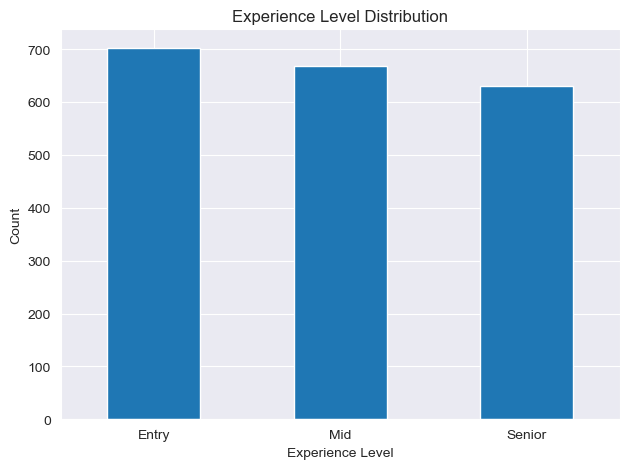

In [20]:
plt.figure()
df['experience_level'].value_counts().sort_values(ascending=False).plot(kind='bar', rot=0)
plt.title("Experience Level Distribution")
plt.xlabel("Experience Level")
plt.ylabel('Count')
plt.tight_layout()
plt.show()


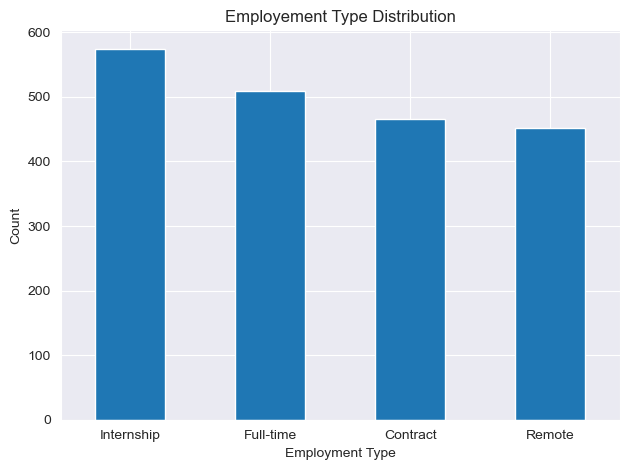

In [21]:
plt.figure()
df['employment_type'].value_counts().sort_values(ascending=False).plot(kind='bar', rot=0)
plt.title("Employement Type Distribution")
plt.xlabel("Employment Type")
plt.ylabel('Count')
plt.tight_layout()
plt.show()


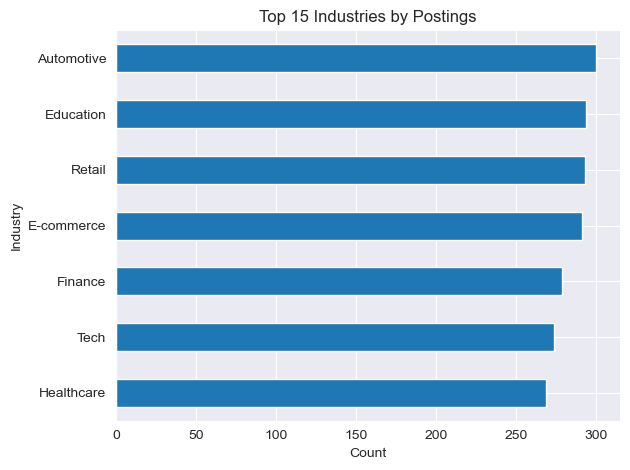

In [22]:
plt.figure()
df['industry'].value_counts().head(15).sort_values(ascending=True).plot(kind='barh', rot=0)
plt.title("Top 15 Industries by Postings")
plt.xlabel("Count")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()

In [23]:
df_cluster = df.copy()

# Feature Engineering
for c in ['job_title', 'skills_required', 'tools_preferred', 'industry']:
    if c not in df_cluster.columns:
        df_cluster[c] = ""

df_cluster['text_blob'] = (
    df_cluster['job_title'].fillna("").astype(str) + " | " +
    df_cluster['skills_required'].fillna("").astype(str) + " | " + 
    df_cluster["tools_preferred"].fillna("").astype(str) + " | " +
    df_cluster['industry'].fillna("").astype(str)
)

if "salary_mid" not in df_cluster:
    df_cluster['salary_mid'] = np.nan 

cat_cols = []
if "experience_level" in df_cluster.columns: cat_cols.append("experience_level")
if "employment_type" in df_cluster.columns: cat_cols.append("employment_type")
if "company_size" in df_cluster.columns: cat_cols.append("company_size")

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# TF-IDF vectorizer for text
text_vec = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    lowercase=True,
    token_pattern=r"(?u)\b\w+\b",
    min_df=2
)

# Ensure numeric columns are float
numeric_cols = ["salary_mean"]
df[numeric_cols] = df[numeric_cols].astype(float)

# Updated OneHotEncoder for scikit-learn ≥ 1.2
cat_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=True)

# ColumnTransformer with updated encoder
preprocessor = ColumnTransformer(
    transformers=[
        ("text", text_vec, "text_blob"),
        ("cat", cat_encoder, cat_cols),
        ("num", StandardScaler(with_mean=False), numeric_cols),
    ],
    remainder="drop",
    sparse_threshold=1.0  # ensures sparse output
)

In [25]:
def evaluate_k(X, k_list, batch=False, random_state=42):
    inertias, sils = [], []
    for k in k_list:
        if batch:
            model = MiniBatchKMeans(n_clusters=k, random_state=random_state, n_init=10, batch_size=256)
        else:
            model = KMeans(n_clusters=k, random_state=random_state, n_init=10)
        labels = model.fit_predict(X)
        inertias.append(model.inertia_)
        # Silhouette need at least 2 clusters and some variance
        try:
            sil = silhouette_score(X, labels, metric='euclidean')
        except Exception:
            sil = np.nan
        sils.append(sil)
    return inertias, sils


# Fit transform once for evaluation
X = preprocessor.fit_transform(df_cluster)

k_list = list(range(2, 13))
inertias, sils = evaluate_k(X, k_list, batch=True)

# Plot elbow (inertia)


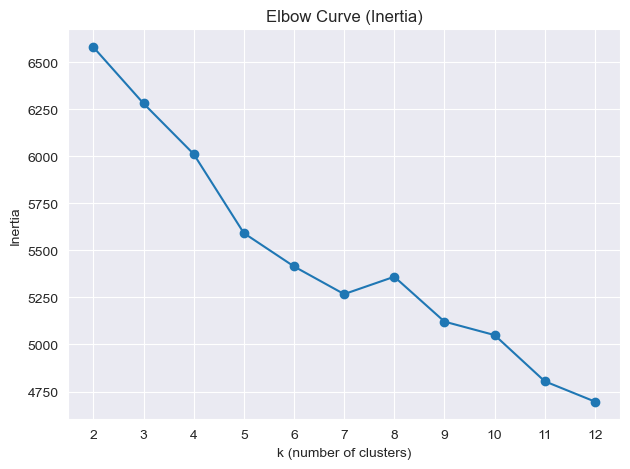

In [26]:
plt.figure()
plt.plot(k_list, inertias, marker='o')
plt.title("Elbow Curve (Inertia)")
plt.xlabel("k (number of clusters)")
plt.ylabel("Inertia")
plt.xticks(k_list)
plt.tight_layout()
plt.show()

In [27]:
if np.all(np.isnan(sils)):
    best_k = 6
else:
    best_k = k_list[int(np.nanargmax(sils))]
print("Chosen k:", best_k)

Chosen k: 6


In [28]:
final_kmeans = MiniBatchKMeans(n_clusters=best_k, random_state=42, n_init=10, batch_size=256)
labels = final_kmeans.fit_predict(X)
df_cluster['cluster'] = labels

print("\nCluster sizes:")
display(df_cluster['cluster'].value_counts().sort_index())


Cluster sizes:


cluster
0    391
1    397
2    346
3    284
4    364
5    218
Name: count, dtype: int64

In [29]:
final_kmeans = MiniBatchKMeans(n_clusters=best_k, random_state=42, n_init=10, batch_size=256)
labels = final_kmeans.fit_predict(X)
df_cluster['cluster'] = labels

print("\nCluster sizes:")
display(df_cluster['cluster'].value_counts().sort_index())


Cluster sizes:


cluster
0    391
1    397
2    346
3    284
4    364
5    218
Name: count, dtype: int64

# Determine column spans contributed by each transformer


In [30]:
feature_names = preprocessor.get_feature_names_out()

# Identify indices for each block by prefix added by ColumnTransformer
text_mask = np.array([name.startswith("text__") for name in feature_names])
cat_mask = np.array([name.startswith("cat__") for name in feature_names])
num_mask = np.array([name.startswith("num__") for name in feature_names])

text_indices = np.where(text_mask)[0]

# For each cluster, sort center weights on text dimensions
centers = final_kmeans.cluster_centers_
text_feature_names = np.array([name.replace('text__', '') for name in feature_names[text_indices]])


def top_terms_for_cluster(c_idx, topn=15):
    weights = centers[c_idx, text_indices]
    top_idx = np.argsort(weights)[::-1][:topn]
    return list(zip(text_feature_names[top_idx], weights[top_idx]))


print("\nTop terms per cluster:")
for c in range(best_k):
    terms = top_terms_for_cluster(c, topn=15)
    print(f"\nCluster {c}:")
    for t, w in terms:
        print(f" {t}: {w:.4f}")


Top terms per cluster:

Cluster 0:
 fastapi: 0.0525
 tensorflow: 0.0506
 langchain: 0.0505
 pytorch: 0.0501
 mlflow: 0.0480
 scikit learn: 0.0465
 scikit: 0.0465
 learn: 0.0465
 engineer: 0.0421
 ai: 0.0406
 kdb: 0.0385
 researcher: 0.0383
 sql: 0.0357
 pandas: 0.0357
 keras: 0.0337

Cluster 1:
 mlflow: 0.0537
 fastapi: 0.0531
 tensorflow: 0.0513
 langchain: 0.0501
 pytorch: 0.0484
 scikit learn: 0.0451
 scikit: 0.0451
 learn: 0.0451
 engineer: 0.0449
 data: 0.0365
 researcher: 0.0355
 reinforcement learning: 0.0339
 reinforcement: 0.0339
 learning: 0.0339
 flask: 0.0331

Cluster 2:
 tensorflow: 0.0560
 fastapi: 0.0527
 pytorch: 0.0507
 langchain: 0.0502
 scikit learn: 0.0493
 scikit: 0.0493
 learn: 0.0493
 engineer: 0.0485
 mlflow: 0.0458
 hugging face: 0.0368
 face: 0.0368
 hugging: 0.0368
 bigquery: 0.0358
 numpy: 0.0350
 aws: 0.0349

Cluster 3:
 fastapi: 0.0534
 mlflow: 0.0527
 scikit learn: 0.0511
 scikit: 0.0511
 learn: 0.0511
 langchain: 0.0483
 tensorflow: 0.0455
 pytorch: 0.0

In [31]:
def cluster_profile(frame, cluster_id, topn=10):
    subset = frame[frame["cluster"] == cluster_id]
    out = {}
    for col in ["job_title", "industry", "experience_level", "employment_type", "company_size"]:
        if col in subset.columns:
            out[col] = subset[col].value_counts().head(topn)
    if "salary_mid" in subset.columns:
        out["salary_stats"] = subset["salary_mid"].describe()
    return out


for c in range(min(3, best_k)):
    print(f"\n=== Profile: Cluster {c} ===")
    prof = cluster_profile(df_cluster, c)
    for k, v in prof.items():
        print(f"\n[{k}]")
        print(v)


=== Profile: Cluster 0 ===

[job_title]
job_title
AI Product Manager          57
AI Researcher               55
Computer Vision Engineer    54
Quant Researcher            53
NLP Engineer                51
Data Analyst                49
Data Scientist              37
ML Engineer                 35
Name: count, dtype: int64

[industry]
industry
Tech          63
Healthcare    60
Automotive    57
Education     57
Finance       55
Retail        55
E-commerce    44
Name: count, dtype: int64

[experience_level]
experience_level
Mid    391
Name: count, dtype: int64

[employment_type]
employment_type
Remote        102
Contract      101
Internship     97
Full-time      91
Name: count, dtype: int64

[company_size]
company_size
Large      153
Mid        122
Startup    116
Name: count, dtype: int64

[salary_stats]
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: salary_mid, dtype: float64

=== Profile: Cluster 1 ===

[job_title]
job_titl

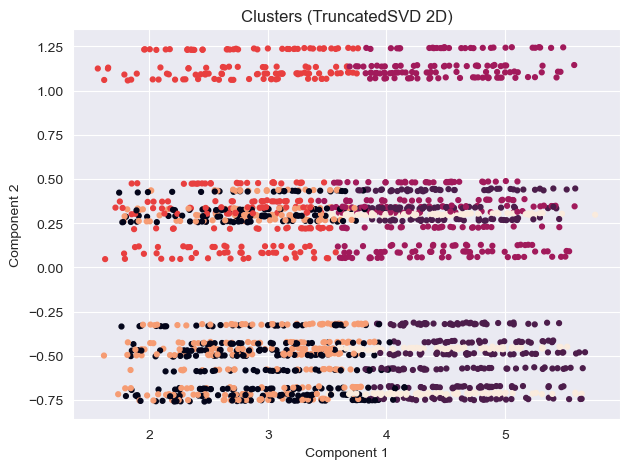

In [32]:
 from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2, random_state=42)
X_2d = svd.fit_transform(X)

plt.figure()
plt.scatter(X_2d[:,0], X_2d[:,1], c=df_cluster['cluster'], s=12)
plt.title("Clusters (TruncatedSVD 2D)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.tight_layout()
plt.show()

### System Design

In [33]:
tfidf = TfidfVectorizer(
        max_features=6000,
        ngram_range=(1,2),
        token_pattern=r"(?u)\b\w+\b",
        min_df=2,
        lowercase=True
    )
job_matrix = tfidf.fit_transform(df_cluster["text_blob"].fillna(""))
job_matrix = normalize(job_matrix, norm="l2", copy=False)

# For quick lookup
JOB_INDEX = pd.Series(df_cluster.index.values, index=df_cluster["job_id"]).to_dict() if "job_id" in df_cluster.columns else {}

In [34]:
def build_user_profile_text(
    skills: Optional[List[str]] = None,
    tools: Optional[List[str]] = None,
    desired_title: Optional[str] = None,
    industry: Optional[str] = None,
    experience_level: Optional[str] = None
) -> str:
    parts = []
    if desired_title: parts.append(str(desired_title).lower())
    if industry: parts.append(str(industry).lower())
    if experience_level: parts.append(str(experience_level).lower())
    if skills: parts.append(" ".join([str(s).lower() for s in skills]))
    if tools: parts.append(" ".join([str(t).lower() for t in tools]))
    return " | ".join([p.strip() for p in parts if p])

def vectorize_text(text: str):
    v = tfidf.transform([text])
    return normalize(v, norm="l2", copy=False)

In [35]:
def apply_filters(
    base_df: pd.DataFrame,
    experience_levels: Optional[List[str]] = None,
    employment_types: Optional[List[str]] = None,
    locations: Optional[List[str]] = None,
    min_salary: Optional[float] = None,
    max_salary: Optional[float] = None,
) -> pd.Series:
    mask = pd.Series(True, index=base_df.index)

    if experience_levels:
        lvls = set([s.strip().lower() for s in experience_levels])
        mask &= base_df["experience_level"].fillna("").str.lower().isin(lvls)

    if employment_types:
        tys = set([s.strip().lower() for s in employment_types])
        mask &= base_df["employment_type"].fillna("").str.lower().isin(tys)

    if locations:
        # case-insensitive contains-any
        locs = [s.lower() for s in locations]
        mask &= base_df["location"].fillna("").str.lower().apply(lambda x: any(loc in x for loc in locs))

    if min_salary is not None:
        mask &= (base_df["salary_mid"].fillna(-np.inf) >= float(min_salary))

    if max_salary is not None:
        mask &= (base_df["salary_mid"].fillna(np.inf) <= float(max_salary))

    return mask

In [36]:
def mmr(
    doc_scores: np.ndarray,
    doc_embeddings: np.ndarray,
    k: int,
    lambda_mult: float = 0.7
) -> List[int]:
    """
    doc_scores: similarity to query for each candidate (1D)
    doc_embeddings: matrix for candidates (n_docs x d)
    k: number to select
    lambda_mult: trade-off (1.0 = relevance only, 0.0 = diversity only)
    """
    n = doc_embeddings.shape[0]
    if n == 0: return []
    selected = []
    candidates = list(range(n))

    # Precompute pairwise similarity between docs (cosine)
    # To avoid huge memory use, compute on the fly for selected vs candidates
    doc_embeddings = normalize(doc_embeddings, norm="l2", copy=False)

    # pick best by score first
    first = int(np.argmax(doc_scores))
    selected.append(first)
    candidates.remove(first)

    while len(selected) < min(k, n) and candidates:
        best_idx = None
        best_val = -1e9
        for c in candidates:
            # max sim to already selected
            sim_to_selected = max(
                float(doc_embeddings[c].dot(doc_embeddings[s].T))
                for s in selected
            )
            val = lambda_mult * float(doc_scores[c]) - (1 - lambda_mult) * sim_to_selected
            if val > best_val:
                best_val = val
                best_idx = c
        selected.append(best_idx)
        candidates.remove(best_idx)

    return selected

In [37]:
def recommend_jobs_for_user(
    skills: Optional[List[str]] = None,
    tools: Optional[List[str]] = None,
    desired_title: Optional[str] = None,
    industry: Optional[str] = None,
    experience_level: Optional[str] = None,
    top_k: int = 15,
    filters: Optional[Dict[str, Any]] = None,
    diversify: bool = True,
    lambda_mmr: float = 0.7
) -> pd.DataFrame:
    # Build and vectorize user profile
    profile_text = build_user_profile_text(
        skills=skills, tools=tools,
        desired_title=desired_title, industry=industry,
        experience_level=experience_level
    )
    q_vec = vectorize_text(profile_text)

    # Similarity to all jobs
    sims = cosine_similarity(q_vec, job_matrix).ravel()

    # Filter candidates
    mask = apply_filters(
        df_cluster,
        experience_levels=filters.get("experience_levels") if filters else None,
        employment_types=filters.get("employment_types") if filters else None,
        locations=filters.get("locations") if filters else None,
        min_salary=filters.get("min_salary") if filters else None,
        max_salary=filters.get("max_salary") if filters else None,
    )
    idxs = np.where(mask.values)[0]
    if len(idxs) == 0:
        return pd.DataFrame(columns=list(df_cluster.columns) + ["score"])

    cand_scores = sims[idxs]

    # Diversity (MMR) or simple top-k
    if diversify and len(idxs) > top_k:
        # Need the embeddings for candidates only
        cand_emb = job_matrix[idxs]
        selected_local = mmr(cand_scores, cand_emb, k=top_k, lambda_mult=lambda_mmr)
        chosen = idxs[np.array(selected_local)]
    else:
        chosen = idxs[np.argsort(-cand_scores)[:top_k]]

    out = df_cluster.loc[chosen].copy()
    out["score"] = sims[chosen]
    return out.sort_values("score", ascending=False).reset_index(drop=True)

In [38]:
def recommend_similar_jobs(
    job_identifier: Any,
    top_k: int = 10,
    filters: Optional[Dict[str, Any]] = None,
    diversify: bool = False,
    lambda_mmr: float = 0.7
) -> pd.DataFrame:
    # Resolve index
    if isinstance(job_identifier, int) and job_identifier in JOB_INDEX:
        base_idx = JOB_INDEX[job_identifier]
    elif isinstance(job_identifier, (int, np.integer)) and job_identifier in df_cluster.index:
        base_idx = int(job_identifier)
    else:
        # try to match by job_id value if column exists
        if "job_id" in df_cluster.columns:
            matches = df_cluster.index[df_cluster["job_id"] == job_identifier]
            if len(matches) == 0:
                raise ValueError("job_identifier not found in job_id column.")
            base_idx = int(matches[0])
        else:
            raise ValueError("Provide a valid row index or job_id present in the dataset.")

    # Similarity to others
    v = job_matrix[base_idx]
    sims = cosine_similarity(v, job_matrix).ravel()

    # Prevent returning itself
    sims[base_idx] = -1.0

    # Apply filters
    mask = apply_filters(
        df_cluster,
        experience_levels=filters.get("experience_levels") if filters else None,
        employment_types=filters.get("employment_types") if filters else None,
        locations=filters.get("locations") if filters else None,
        min_salary=filters.get("min_salary") if filters else None,
        max_salary=filters.get("max_salary") if filters else None,
    )

    idxs = np.where(mask.values)[0]
    if len(idxs) == 0:
        return pd.DataFrame(columns=list(df_cluster.columns) + ["score"])

    cand_scores = sims[idxs]
    if diversify and len(idxs) > top_k:
        cand_emb = job_matrix[idxs]
        selected_local = mmr(cand_scores, cand_emb, k=top_k, lambda_mult=lambda_mmr)
        chosen = idxs[np.array(selected_local)]
    else:
        chosen = idxs[np.argsort(-cand_scores)[:top_k]]

    out = df_cluster.loc[chosen].copy()
    out["score"] = sims[chosen]
    return out.sort_values("score", ascending=False).reset_index(drop=True)

In [39]:
def show_recommendations(table: pd.DataFrame, cols: Optional[List[str]] = None, n: int = 10):
    if cols is None:
        cols = ["job_id","company_name","job_title","industry","experience_level","employment_type",
                "location","salary_range_usd","score"]
        cols = [c for c in cols if c in table.columns]
    display(table[cols].head(n))


# Example similar jobs to a given job_id (or dataframe index if no job_id column)

In [40]:
sample_job_id = int(df_cluster.iloc[0]["job_id"]) if "job_id" in df_cluster.columns else 0
recs_similar = recommend_similar_jobs(sample_job_id, top_k=10, diversify=False)
show_recommendations(recs_similar, n=10)

,job_id,company_name,job_title,industry,experience_level,employment_type,location,salary_range_usd,score
0,1720,Grimes-Cruz,Data Analyst,Healthcare,Entry,Contract,"West Nicolefurt, US",145486-222351,0.355461
1,1662,"Anderson, Tucker and Phillips",Data Scientist,Healthcare,Mid,Remote,"Jenniferborough, CO",76395-94209,0.353661
2,345,"Anthony, Miller and Russell",Data Analyst,E-commerce,Senior,Internship,"East Linda, NZ",120234-139093,0.343893
3,1198,Woods-French,AI Researcher,Healthcare,Mid,Internship,"South Meagan, GQ",81361-133784,0.324863
4,1821,Townsend Inc,ML Engineer,Education,Mid,Remote,"Cooperstad, CO",133127-147369,0.323923
5,780,Harris and Sons,Data Analyst,E-commerce,Entry,Internship,"Amandabury, GW",142504-235377,0.320424
6,1020,"Vasquez, Grimes and Mooney",ML Engineer,Healthcare,Entry,Remote,"Brewerland, AT",58091-128175,0.317439
7,707,Rojas-Mckinney,ML Engineer,Tech,Senior,Contract,"East Anthony, CM",112652-183753,0.316202
8,1738,Marshall Group,Data Analyst,Healthcare,Senior,Remote,"Zacharyside, PG",136382-182715,0.307960
9,784,"Walker, Miller and Williams",Data Analyst,Automotive,Entry,Internship,"New Jonathanview, ME",130779-223455,0.303214


In [41]:
recs_user = recommend_jobs_for_user(
    skills=["python","pandas","tensorflow","nlp"],
    tools=["pytorch","mlflow"],
    desired_title="machine learning engineer",
    industry="technology",
    experience_level="Senior",
    top_k=15,
    filters={
        "experience_levels": ["Senior","Mid","Lead"],
        "employment_types": ["Full-time"],
        "locations": ["new york", "san francisco", "remote"],  # substring match
        "min_salary": 90000,
        "max_salary": 250000
    },
    diversify=True,
    lambda_mmr=0.7
)
show_recommendations(recs_user, n=10)

,job_id,company_name,job_title,industry,experience_level,employment_type,location,salary_range_usd,score
